# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta= 0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$? What might influence the results in this case?
5. Answer questions 1-4 with a desired orientation of $\theta = \frac{\pi}{4}$?

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

In [103]:
#%matplotlib notebook  #uncomment for Jupyter
%matplotlib inline     #uncomment for VSCode


import numpy as np
import matplotlib.pyplot as plt
#from numpy import sin, cos, pi
import quadrotor
import sympy as sym

from sympy.utilities.lambdify import lambdify
#from sympy import exp, sqrt, sin, cos, Matrix
#from sympy import Matrix
#from sympy import symbols, Symbol
#from sympy import symbols

In [104]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


In [105]:
# we can simulate the robot but we need to provide a controller of the following form
x,V_x,y,V_y,theta,omega,u1,u2 = sym.symbols('x V_x y V_y theta omega u1 u2')
dt=quadrotor.DELTA_T
mass=quadrotor.MASS
Len=quadrotor.LENGTH
Inertia=quadrotor.INERTIA
grav=quadrotor.GRAVITY


np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

def get_linearization(z,u):
        # Description
        dt=quadrotor.DELTA_T
        mass=quadrotor.MASS
        length=quadrotor.LENGTH
        Ine=quadrotor.INERTIA
        grav=quadrotor.GRAVITY

        #_______________________
        x     = z[0]
        V_x   = z[1]
        y     = z[2]
        V_y   = z[3]
        theta = z[4]
        omega = z[5]

        u1 = u[0]
        print(u[1])
        u2 = u[1]
        print(u[1])
        #________________________

        #_________________________________________________________replace 1 and 2
        #z_next=quadrotor.get_next_state(z,u)
        #_____________________________________________________________replace 1 and 2

        #__________________________________1
        # Continuous Dynamics for Quadrotor in Symbolic
        A_pseudo = sym.Matrix([[V_x],[0],[V_y],[-grav],[omega],[0]])
        B_pseudo = sym.Matrix([[0],[(-sym.sin(theta)/mass)*(u1+u2)],[0],[(sym.cos(theta)/mass)*(u1+u2)],[0],[(length/Ine)*(u1-u2)]])  
        dzdt=A_pseudo+B_pseudo
        dzdt_T=dzdt.T
        #___________________________________1
        
        #___________________________________2
        # Discrete Dynamics for Quadrotor in Symbolic
        z_n_T= z.T
        z_next = z_n_T + (dt*dzdt_T)
        #___________________________________2

        #___________________________________3
        # Jacobian from the Discrete Dynamics in Symbolic and Numeric
        A_sym = z_next.jacobian(z)
        B_sym = z_next.jacobian(u)
        A_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),A_sym,'numpy')
        B_num = lambdify((x,V_x,y,V_y,theta,omega,u1,u2),B_sym,'numpy')
        #____________________________________3

        return A_num,B_num

#make A,B,K global
z_n = sym.Matrix([[x],[V_x],[y],[V_y],[theta],[omega]])
u_n = sym.Matrix([[u1],[u2]])
A_out,B_out=get_linearization(z_n,u_n)


def dummy_controller(state, i):
    """
        the prototype of a controller is as follows
        state is a column vector containing the state of the robot
        i is the index corresponding to the time step in the horizon (useful to index gains K for e.g.)
        
        this controller needs to return an array of size (2,)
    """

    def inf_LQR(A, B, Q, R, QN, N):
        #N=30
        P_n=[]
        K_n=[]
        list_of_P = []
        list_of_K = []
        K=N+1
        for i in range(0,K):
            if i == 0:
                PN=QN
                P=PN
                list_of_P=[P]

            else:
                BT=np.transpose(B)
                AT=np.transpose(A)
                
                #_______Getting K
                Y = BT @ P
                Y1 = np.linalg.inv((Y @ B) + R)
                K_n = -Y1 @ Y @ A
                #_____________
                #_______Getting P
                Z = AT @ P
                Z1 = Z @ B @ K_n
                P_n = Q + (Z @ A) + Z1
                P = P_n
                #_____________
                list_of_P.insert(0,P)
                list_of_K.insert(0,K_n)

        return list_of_K

    u_n1=np.zeros(2)
    u_n1[0]=mass*grav*0.5
    u_n1[1]=mass*grav*0.5
    A=A_out
    B=B_out
    A1 = A(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    B1 = B(state[0],state[1],state[2],state[3],state[4],state[5],u_n1[0],u_n1[1])
    Q=np.eye(6)*100
    R=np.eye(2)*0.01
    QN=Q
    N=1000
    K=inf_LQR(A1,B1,Q,R,QN,N)

    x_n=state.reshape(len(state),1) 
    K_n=K[i][:][:]   #Initializing necessary variable to store K_n
    #print(K_n.shape)
    u_n=(K_n @ x_n) #Formula from Prof L. Righetti
    u=u_n.reshape(len(u_n),) #reshape of u/u_n to allow for stacking

    # here we do nothing and just return some non-zero control
    return u




# we can now simulate for a given number of time steps - here we do 10 seconds
horizon_length = 1000
z0 = np.zeros([quadrotor.NUMBER_STATES,])
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = False)

u2
u2


Text(0.5, 0, 'Time [s]')

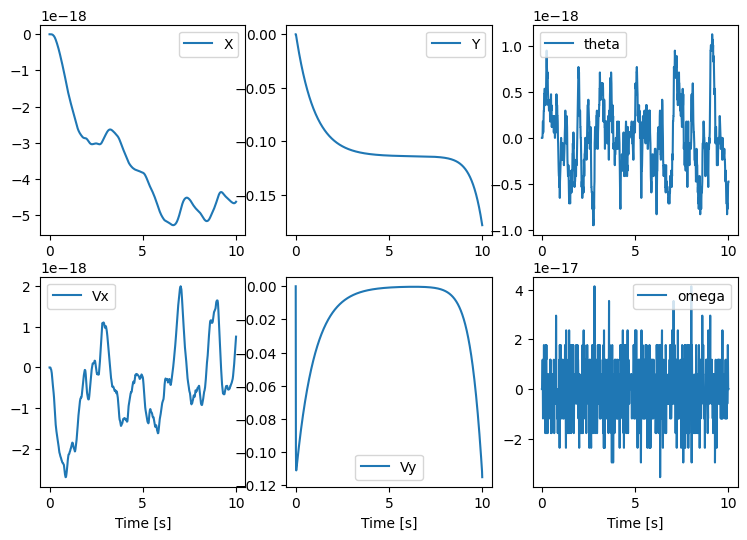

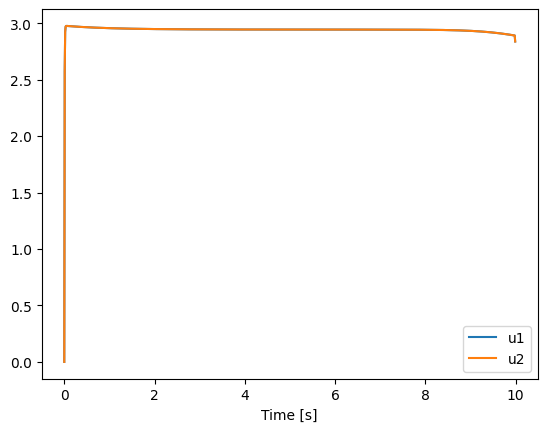

In [106]:
# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

In [107]:
# now we can also create an animation
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAALUhtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ElRliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V3pz9EVrs4VX+S4UoeP6SozgOTM/s8GAALoAAAMCf65ejyPknRO
8qJAzicsMP5cCD014Ppbxxx7aX8VHrYhVMlpmalle1Y/c/cE/wC3LWS/fxx66dhK0XID/TkvyE+e
ly3wbAJaXNO1sK9NF4QcnPVrmC2lMAE0/L7+0K68xHpaAm9Kw2frV7Mc6MY3CpuN6IfRhIN1AwrO
eibMPA70a6/y9fQDGedSSwqodugnmDmgijzvsxaXgGtXRGUrDQgXBdj+4LX82tWaz5ghGQBtPbQZ
5VBg96frMYBV/YoLK6+L+ju8Hjqc/FKb+oyB4yMz+VqiGSA0zRIFoUJevM24L7eydq2v28GaTOqW
iUK06kReiKM1E9/axfRKDwC5mSoAc3+TrQxM1efVKtrsnat03AKfqX/lryN4QHC7N5O7IMwXK1EO
P56L/BivJTTR01AngpGmcV+Im5cnwvI5TzfaD1LCJj+uKbwAAAMAAAMAAAMAAAlRyFPrzmm1i8VI
nm9E8GdKFxqhWVu/V++cB0nJD3+HhjYw1O3F0pBOt8X2WwQUurjeRxZSFIycqkDjhHAc8RLhDjVD
1PQRfDSG7ymNaO1uEuCkbk77DSqktjYgf5P2wFOr/Uz+LSbx6el0bGH/OnCN3oRVc0spfxoKmrdf
mY21n9P9d7r4Sn832nq4fjwmtp43H4qyugzEbdTaN+W2JNeeudRYXAayjEWwaPQmq7m8c6UMjwJs
3aGR3ALm+CrShdT5EyKbw2ErxZB1tHO+1/8hqthoH2mJIBqiCSA2/c3qX/0f+WFrQnzx4ZXMu8UY
/6kdM/z2vNkUquAPk8XIbIUBKF97ZANsN7aGYwAx5/o/ZwX4ztpwxXBUs7G+fYO5M6dIwI40W9AH
ywv7VAAADwG3+EAAe0Vi5IANJidjgBUzHIiPX1ZMOUXIW3DenJ6QoPjHwkEFEMxGLjMPeMsBQaLH
k0oVQ8TeIk3P/8JwmzpOb8uwdVLuxnhiXNdwtZywzJpuVU7MFBdOItf1s5Wv3MadGmhBqDxkINwd
qd6WKIqpuYYOiUZQt/+GaHftiuowiY2waS2KZBbJN6IPGA+CheL/DJvd1NLOEP0ovSOlk6W86GMn
9gCxb08z+rBpdUoD6rfYDMbrUHDv4z1JXoPHc/wqGHRQfyIRRJnZQHPe5lV6F+XV1bG4gkZpKmGk
vPSfJZRJW6S1pj7YLJHl+K+9t2WPvKXQImZnfHrr2s6A1wcpieLdnKOtkEgbiMjj66Uhy9TL36Qr
mynk4a2+OsxUgfOQLN70OukkMMxtoP60jTpocytZsQQ7bSxTnEVYzKmKvE+7+L3/HdAQorvNsEBu
iGkOdGuPIbO2S+wLIPwDbMxEE75Mnov1dQeCuedEOtWP+FUiOGfqSdxgNh9r1dAAACxBviQAAF7L
OJ4AMn5HUzm3p0EuV/Gyq57tBj7XN2+CpawMe8cQuUcIwZrVgDO0G7JBPlThOGmfQtX+S6j1UU+d
TtCSC61x7piH5tLAgtf1sOLGl7p+t6KoWQvuDuwx+TzlwYJ9HzbIv2g05yd0zgP2+KPv/cw60MmH
Eg9mLOPjRVZmwMilu0JX3OkiX/qulqb26D/8nyoqfCwyVTXSjhXUuFpgVJSvp0NHFOGiBLfl2ppa
es6VJ60vEZjDVeBEG/MaN68hFpYitY5+fCaaXOzv3TTIftfNbraC6Y5gb1ToIICAiQsKrHxNfcjb
0qrdkKPV6zngOBamEgcoEjXktX3TbdQ7JV8rMPICoC3JLXbB2lIqAdx5wDwJuUd97uqT4e+9/RNm
5q5zdvoTVPLpU5eAns7+Hpcv1xXfecVCAeicgiGFNI0QdqGGnceDynl6ZYmyS7A/f8Knq6Y+o3c2
obnRC5b4MgDYP/0yhhvQeGHPkHzQXKdL49BcYXkUeb3kAvro4tXfL22IbzRu2JtRAivxzBp+ssPx
JzXx8/Trhdyi9ITD54tEKrxbiz21p2QjRk8Zkw4FXAeuFH+78GNo8KXUAwM7Bi8qTBS57eCdDiCf
ogRqiw7qyeO7oNMwGFX2/jgcfY5Gd8cnXwNNdRSGRrJHjdgRGci3v83iLvdf9pZO1Yd25Gthr5XL
DZf6almjdAwdb9ce8ndgvnkaYJfT8Q03qmeLsFhoeNI+aiOvhc2zbsNRCXNZ5uPMESv9RFh78c21
HjnR6haRbeL4krH+b2Xx/5GeTCJLQJEn7PAAAAUIUxwARt4v+XBtxFa0WgAACUslLCOwPB31KcZ6
zab0sNVCtKeEzrG5UWZyNRrcpyi+LSViRK0bcY7MOduLupbOC6QizZR7d5SyxIOeTEWW3tDGq9DD
fh9RK0EGUyPxnnQnq7kYB4TlYrIffBHP9FT9VifjOJ/bGpb4I4ENim+ZUgG6o3pUk2mwPFfh9vMr
2n/AV3ONizh7wqwHjr98b

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZjVtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwMSBiMDkzYmJlIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTI3
IGxvb2thaGVhZF90aHJlYWRzPTQgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Ei9liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLgux/cFr+bWrNZ8wQjIA2nto
M8qgwe9P1mMAq/sUFldfF/R3eDx1OfilN/UZA8ZGZ/K1RDJAaZokC0KEvXmbcF9vZO1bX7eDNJnV
LVGDgEflk8TbjPf2sX0Sg8Aui7KOr+2SyYDTGe+U6rY1BDudAbL74edZoy/ryN5kt8iymceQZguV
qIcfz7v+DFeSmmipttXMaRs4sCVTG4HceRynmjPBEUkSR99iiQAAAwAAAwAAAwAABTorZZQCtNrF
4n4UAjp4M6ULjVCsrd8do84DpOSHv8PDGxhp5uLpSCdb46p2sQmNXG8jiykKNs5VIHHCOA54iXCH
Grmih6C+GkN3lMa0drcJcFI3WssFydnqVg+Vl1LJ1QIQUAOowFq6Kc88vv9z7ve1Qb4UBg6torKk
1rpmNtZ/T/Xe6+Ez+EjZHG90CyaEPZ7cVZXQZiNuptG93TEmvPNuisLgNZSWC1YVoTVd7eOdKGR4
E2btWF6qv3qENxSIo0iZFN4bCV4sg09Z1np+JTLGGMjd+iSAaogkgNq3Dqg/+BV+wa5J88frVKTF
qMf9SOmf57XmoKVXAHyeLjQYiwNOAu2QDbBzy6MBARUf5V2eFXoaFOMXBP+tjfPsHcmdVXsBA/qC
gGUSyBIAAN27uWYP++KoQCJEyEkgAfJLJEIAN+UwdoCChGREevryQcouQtuG9OT0hQcT5NIIKIZi
MXGYb5pYCg0WPJpQqh8aDeD1GO2TymzpOb8uwdVLuxnBiXNdwtZywzJpuZapes2MI34Hil8Wv3Ma
dG8RBqMxkINwdqd6WKIqDjCYhxsajHH/LNDv2xXUYRMbYMubZsgtkm9EHjAfBQvGPhk3u6mlnCH6
UZrsYab3zs2frewBYt6vbb5/3rwFX9vTkt0QJqDh38Z6wAAwn6/pLsDooWZEIokzsoDnvcyoFywy
dsk2CMEZpKmSkvPSfJZRJW6S3V4fYLJGKdPSbbssfcW/HHfFnAuccafB9cxDBNMa7GUdbIJI3EZH
H10pDl6mWf1/J9eCcw1t8Y5e+tyK7L5kWB8wlNr+b+v8kIxO83x1ioMVviWKcsC2GZUxV4n3fxe/
47oCFHd5tggN0Q0hzo1Y7RBjpDdooLTFzroNUe23FU7+/dSPwpPVPECSnLfp/xKN0tv1XB+9IOAA
A6xz+R2r8+QAAElb7hqBM2mgBYq+S1CFfPx3CcDaiX7haxQ+m01sjncKAFcZQ/RVzNVpKgMDQbzQ
8eyi6PoE9u/6PpfJDVsv1me/04IekIxWS4S9aTx/mTR5Rf2Da6hxQshfcHdhj8nHiXxBSPnAtftB
pzk7p6VYOENsKBfJq3y2gUDrYs4+NFVmbAyKW7TpfqomB6T9PPDh+IRIS1YYZKprpRwrqURA5amq
P+VYN+VNC3xtC7U0tPWdKij2GrnzDVeBEG9W5Cnowo7PjYwAzAYKaaXPbacc4OCRLVPP/NZJ5PHc
BsVK6ZBp4f1SoDgUi2XNiP7/rVcNbzms2zF+KN3DJJLVCa3YHCvlpic+HY7ldKVe/q1vHkNNJolL
6czIyvLQdneDNvWy1tydF1SbpwErGo1ai2rbMHKsZ34qipihgpNrZfVnKIWcdFjZN3s6n8Yri04b
KgDnSDdEBePWQKJIOkpfnR62cNBqIjRz4RfurEyR9rdJkhKBF5XH8uw2XTMnSHpLkXLJRTxkKjqp
+HCwPtpAjLav2YFMqduy06mm2evdnPtuWGIpWoR6JprhR/u/B+5KjlgL/vW6q6NbwK1z6FIf3wjF
18GXTf0d2e9v7wcU2gFJA4+xyM75169eBY/gV6lOSPG7AmucjdeArrdfj//KaejBeYZ7VQJe/LVj
1pgq53Y0owoi2+D219EjLTvB6doeCI432FtwC5PyHnuT5SNHUiDj3Hzz3aTScG7vDRyRDplDnwMO
F7CmmaasRE8QAAAPBx08EuwyQ3/xXpSkAAADAAADAO8oJgf1tduFcoWMs0NV+bVKWDgXJTMEVSbK
fC24ExZjf3xFAPT5ug6fC9jOru0iLN4Ws9zW/PFoAsw/UNrKf8+4GgI2yy/CYuxGGQnbyudz4+X2
0MtwyH1SEsBekvtk2+TZNUElT8d25wwmd0VNUWyegMmc4DPS+UXtpYnNA48GhQh6IDeoTJrV5UZA
87Xt4rjEHVHqcp3y/dYQG

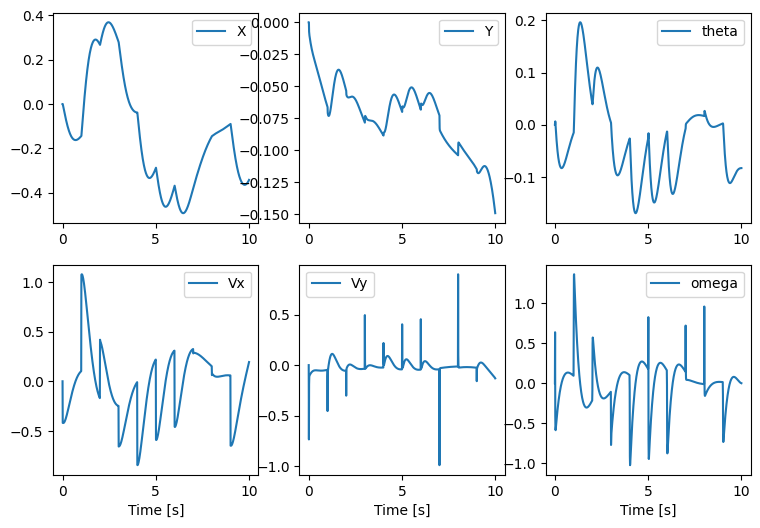

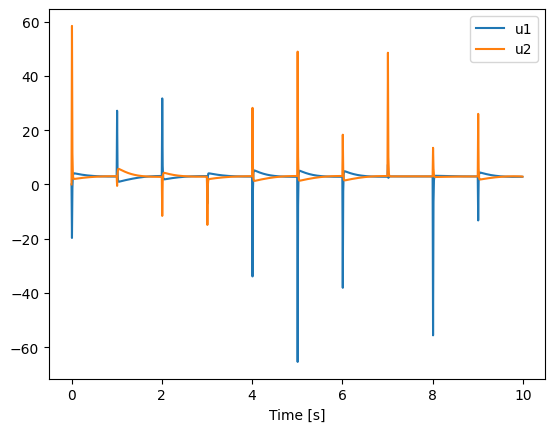

In [108]:
# we can also simulate with perturbations
t, state, u = quadrotor.simulate(z0, dummy_controller, horizon_length, disturbance = True)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

quadrotor.animate_robot(state,u)